In [27]:

import numpy as np
import pandas as pd
import ast
import statsmodels.api as sm
import sqlite3
import datetime

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [117]:
Klm_sent=pd.read_csv('sentimentklm.csv', encoding='utf-16').dropna(thresh=5)
Klm_sent['created_at'] = Klm_sent['created_at'].astype(str)
Klm_sent = Klm_sent.sort_values(['created_at'])
Klm_sent = Klm_sent.reset_index()
Klm_sent['user.id_str'] = Klm_sent['user.id_str'].astype(str)

Klm_sent.head()

,index,Unnamed: 0,created_at,favorite_count,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,lang,quoted_status_id_str,retweet_count,text,user.id,user.id_str,entities,quoted_status,twee,sentiment
0,168426,@FNVSchiphol @FNV https…,1052697751.0,1.052698e+09,"{ ""hashtags"" : [ { ""text"" : ""KLMWorker"", ""indi...",NaN,KLM,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
1,168548,@FNVSchiphol @FNV https…,107765336.0,1.077653e+08,"{ ""hashtags"" : [ { ""text"" : ""KLMWorker"", ""indi...",NaN,KLM,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
2,168483,@FNVSchiphol @FNV https…,112021428.0,1.120214e+08,"{ ""hashtags"" : [ { ""text"" : ""KLMWorker"", ""indi...",NaN,KLM,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
3,167564,@FNVSchiphol @FNV https…,113135648.0,1.131356e+08,"{ ""hashtags"" : [ { ""text"" : ""KLMWorker"", ""indi...",NaN,KLM,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN
4,68418,could you contact me to fix connection @KLM,117376451.0,1.173765e+08,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN


In [118]:
Klm_sent['created_at']= pd.to_datetime(Klm_sent['created_at'],errors='coerce')


In [119]:
Klm_sent['weekday']=Klm_sent['created_at'].dt.weekday
Klm_sent['month']=Klm_sent['created_at'].dt.month
Klm_sent['day']=Klm_sent['created_at'].dt.day
Klm_sent['hour']=Klm_sent['created_at'].dt.hour

In [120]:
Klm_sent = Klm_sent.dropna(subset=['month', 'day'])
Klm_sent_grouped1=Klm_sent.groupby(['month','day'])
Klm_sent_grouped1['sentiment'].mean()

month  day 
1.0    27.0    0.101035
       28.0   -0.135324
       29.0   -0.086678
       30.0    0.006172
       31.0    0.143067
2.0    1.0    -0.035211
       2.0     0.100467
       3.0     0.110888
       4.0     0.203873
       5.0    -0.005005
       6.0     0.116211
       7.0     0.180165
       8.0     0.115731
       9.0     0.163630
       10.0    0.050884
       11.0    0.184586
       12.0   -0.006432
       13.0    0.118425
       14.0    0.377263
       15.0    0.136099
       16.0    0.154823
       17.0    0.013686
       18.0    0.099094
       19.0    0.016357
       20.0    0.032567
       21.0    0.157933
       22.0    0.042986
       23.0   -0.078890
       24.0   -0.017327
       25.0    0.347147
                 ...   
11.0   30.0    0.455111
12.0   1.0     0.753839
       2.0     0.270157
       3.0     0.209211
       4.0     0.459321
       5.0     0.679935
       6.0     0.297637
       7.0     0.180560
       8.0     0.378507
       9.0     0.375406
    

In [121]:
Klm_sent_grouped1.head()

,index,Unnamed: 0,created_at,favorite_count,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,user.id,user.id_str,entities,quoted_status,twee,sentiment,weekday,month,day,hour
77,26993,1425900,2016-08-05 00:02:05,0.0,low,7.613515e+17,7.613515318368911e+17,all_airlines,NaN,NaN,...,1.521717e+08,152171672.0,"{ ""hashtags"" : [ { ""text"" : ""AirlineComplaints...",NaN,KLM,0.0,4.0,8.0,5.0,0.0
78,169397,1425914,2016-08-05 00:04:17,0.0,low,7.613521e+17,7.613520884460544e+17,KLM,7.613511e+17,7.613511e+17,...,2.302348e+08,230234820.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,0.0,4.0,8.0,5.0,0.0
79,26994,1425939,2016-08-05 00:06:28,0.0,low,7.613526e+17,7.613526350058004e+17,NaN,NaN,NaN,...,9.935200e+08,993520008.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,klm,0.0,4.0,8.0,5.0,0.0
80,26995,1425945,2016-08-05 00:07:31,0.0,low,7.613529e+17,7.613529018392207e+17,KLM,NaN,NaN,...,8.417454e+08,841745401.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,1.0,4.0,8.0,5.0,0.0
81,169398,1426016,2016-08-05 00:14:12,0.0,low,7.613546e+17,7.613545849420759e+17,NaN,NaN,NaN,...,7.268759e+17,7.268759360424346e+17,"{ ""hashtags"" : [ { ""text"" : ""Grotebazen"", ""ind...",NaN,KLM,0.0,4.0,8.0,5.0,0.0
1102,32258,1687728,2016-08-26 00:01:16,0.0,low,7.689615e+17,7.689614733223772e+17,NaN,NaN,NaN,...,3.282473e+08,328247314.0,"{ ""hashtags"" : [ { ""text"" : ""SintMaarten"", ""in...",NaN,KLM,0.0,4.0,8.0,26.0,0.0
1103,32259,1687750,2016-08-26 00:03:10,0.0,low,7.689620e+17,7.689619521105756e+17,NaN,NaN,NaN,...,2.360508e+07,23605079.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,-1.0,4.0,8.0,26.0,0.0
1104,32260,1687770,2016-08-26 00:04:39,0.0,low,7.689623e+17,7.689623264857539e+17,jbsrq,7.689620e+17,7.689620e+17,...,2.779704e+07,27797045.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,0.0,4.0,8.0,26.0,0.0
1105,32261,1687822,2016-08-26 00:07:43,0.0,low,7.689631e+17,7.689630956747489e+17,NaN,NaN,NaN,...,7.022384e+08,702238371.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,0.0,4.0,8.0,26.0,0.0
1106,32262,1687849,2016-08-26 00:09:10,0.0,low,7.689635e+17,7.689634614180577e+17,KLM,NaN,NaN,...,7.022384e+08,702238371.0,"{ ""hashtags"" : [ ], ""user_mentions"" : [ { ""sc...",NaN,KLM,0.0,4.0,8.0,26.0,0.0


In [122]:
Klm_sent_grouped=Klm_sent.groupby(['month','day'])['sentiment'].mean().reset_index()
Klm_sent_matrix = Klm_sent_grouped.pivot('month', 'day', 'sentiment')
Klm_sent_matrix = Klm_sent_matrix.fillna(0)
Klm_sent_matrix

day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
month,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.101035,-0.135324,-0.086678,0.006172,0.143067
2.0,-0.035211,0.100467,1.108878e-01,0.203873,-0.005005,0.116211,0.180165,0.115731,0.163630,0.050884,...,0.042986,-0.078890,-0.017327,0.347147,0.067042,0.157842,0.249869,0.000000,0.000000,0.000000
3.0,0.101344,0.233406,2.195331e-01,0.082022,0.047432,-0.012396,0.147137,0.001998,0.065547,0.087658,...,-0.035792,-0.002741,0.105461,0.038933,0.056586,-0.001196,0.046745,0.175456,0.000000,0.000000
5.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.074603,0.107552
6.0,0.019369,0.051888,7.911184e-02,0.085195,-0.018355,0.061703,0.015338,0.010241,0.106177,0.041434,...,0.269942,0.034798,-0.002197,0.024246,-0.013008,0.201503,0.060303,0.052249,0.058761,0.000000
7.0,0.034311,0.005983,3.204107e-19,0.159269,0.079827,0.224763,-0.007483,-0.024471,0.233795,0.099376,...,0.092592,-0.020221,-0.030297,0.058404,-0.165505,0.060997,0.311780,-0.046795,-0.001827,0.021688
8.0,-0.060383,-0.063808,-4.350771e-02,-0.008411,0.109298,0.077240,0.161238,-0.025404,0.108733,0.124809,...,0.029209,0.118735,0.272279,0.182232,0.075211,0.163881,0.073099,0.071910,0.010571,0.185856
9.0,0.081650,0.081932,1.706968e-01,0.031826,0.047156,0.033532,0.002053,0.052095,0.005056,0.100788,...,0.182507,-0.022906,0.019388,0.034795,0.383978,0.245300,0.479026,0.382223,0.247437,0.000000
10.0,0.314540,0.369634,4.505952e-01,0.177105,0.247592,0.074377,0.151201,0.260928,0.102815,0.174062,...,0.432220,0.261207,0.463263,0.096913,0.100789,0.192798,0.300555,0.259219,-0.031591,0.319095


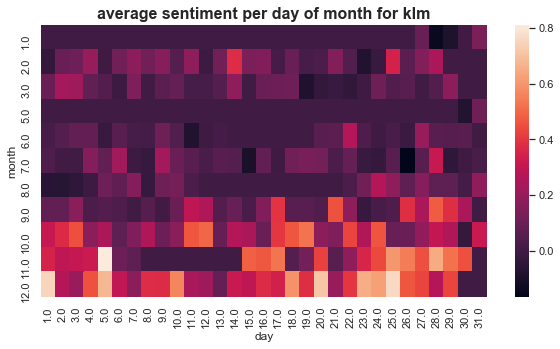

In [123]:
ax_3 = sns.heatmap(Klm_sent_matrix)
ax_3.set_title('average sentiment per day of month for klm', size=16, weight='bold')
ax_3.set_ylabel('month')
ax_3.set_xlabel('day');


In [124]:
Klm_sent_grouped2=Klm_sent.groupby(['weekday'])
Klm_sent_grouped2['sentiment'].mean()

weekday
0.0    0.226533
1.0    0.202571
2.0    0.213004
3.0    0.213176
4.0    0.192069
5.0    0.264796
6.0    0.185081
Name: sentiment, dtype: float64

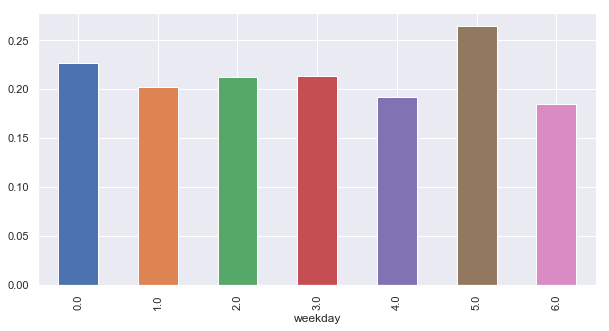

In [125]:
Klm_sent_grouped2['sentiment'].mean().plot(kind='bar')